# Distribution Plots

Here are some plots that allow visualization of distributions of a data set:

* `distplot`
* `jointplot`
* `pairplot`
* `rugplot`
* `kdeplot`

___
### i. Imports

In [1]:
import seaborn as sns
%matplotlib inline

### ii. Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## I. distplot

The `distplot` shows the _distribution of a **univariate** set of observations_.

/var/folders/7z/fsly57qx33z50pnnzrqy8rbr0000gn/T/ipykernel_22642/1093071496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

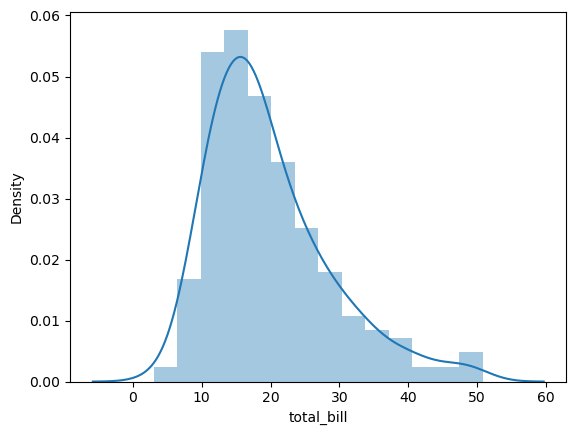

In [3]:
sns.distplot(tips['total_bill'])
# ignore warnings

To remove the kde layer and just have the histogram use:

/var/folders/7z/fsly57qx33z50pnnzrqy8rbr0000gn/T/ipykernel_22642/1274391954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30)


<Axes: xlabel='total_bill'>

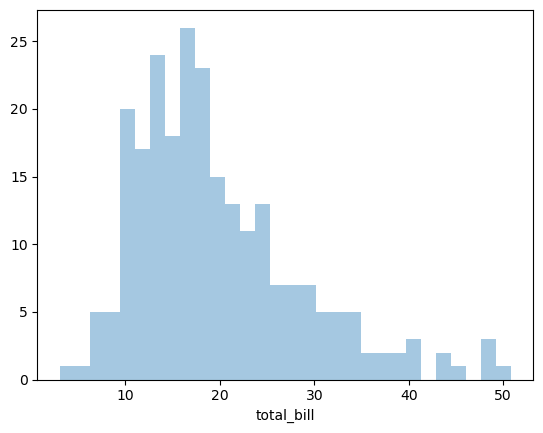

In [8]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## II. jointplot

`jointplot()` allows you to basically _match up two distplots for **bivariate** data_. With your choice of parameter to compare with, such as:
* `scatter` 
* `reg` 
* `resid` 
* `kde` 
* `hex`

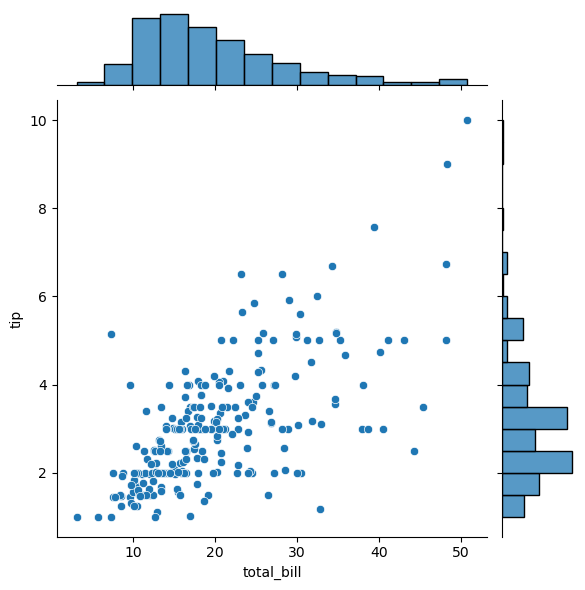

In [17]:
# SCATTER
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

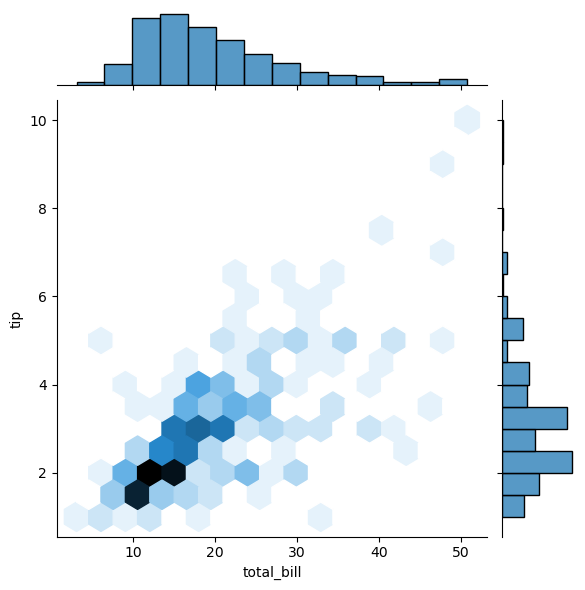

In [13]:
# HEX
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

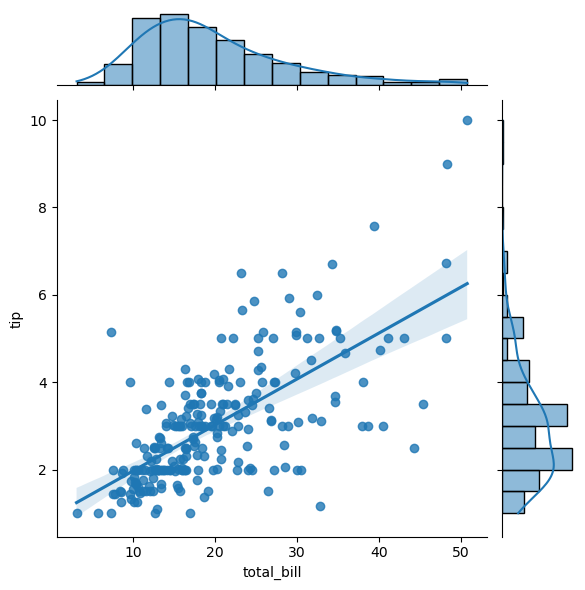

In [14]:
# REGRESSION
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

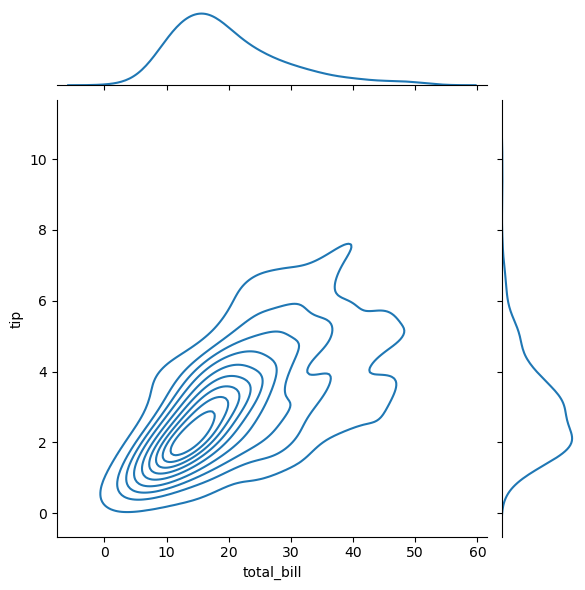

In [18]:
# KERNEL DENSITY ESTIMATE (KDE)
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## iii. pairplot

`pairplot` will _plot **pairwise relationships** across an entire dataframe_ (for the numerical columns) and supports a color hue argument (for categorical columns). 

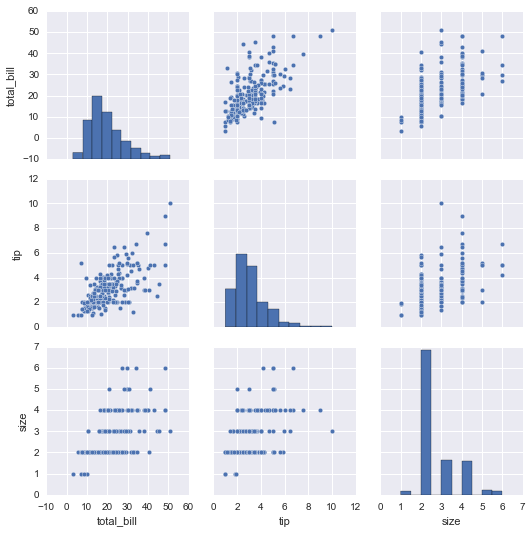

In [18]:
sns.pairplot(tips)

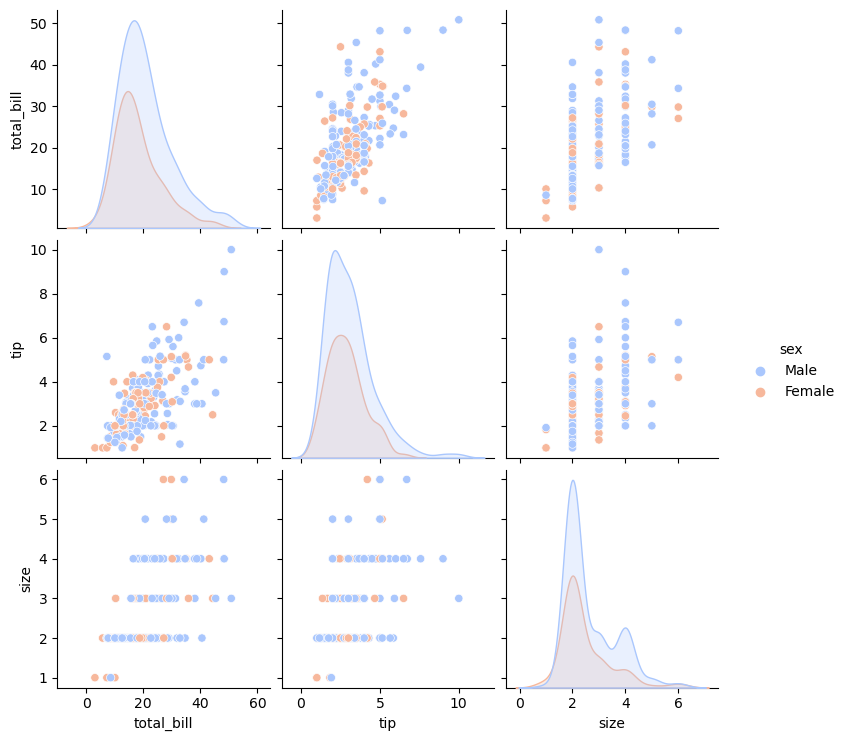

In [20]:
# Customizing HUE & COLOR PALETTE
#     - in this case, changing the hue depending on the sex
sns.pairplot(tips,hue='sex',palette='coolwarm')

## iv. rugplot

`rugplots` _draw a dash mark for every point on a **univariate distribution**_. They are the building block of a KDE plot. 

NOTE: the difference between rugplots and histograms are that histo count the number of _dashes_ in a bin and displays that whereas rugplots just tally.

<Axes: xlabel='total_bill'>

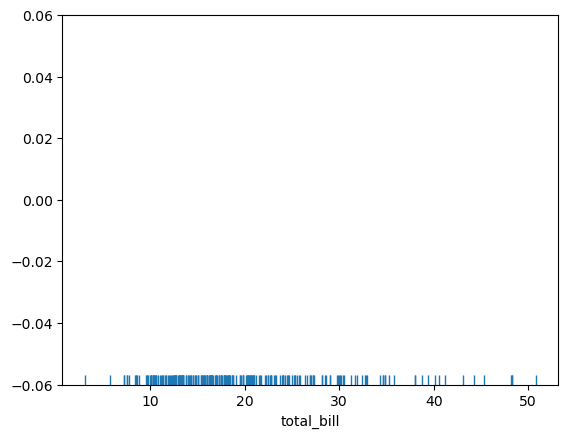

In [21]:
sns.rugplot(tips['total_bill'])

## v. kdeplot

`kdeplos are` [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These **KDE plots** _replace every single observation with a Gaussian (Normal) distribution centered around that value_. For example:

(0.0, 0.5)

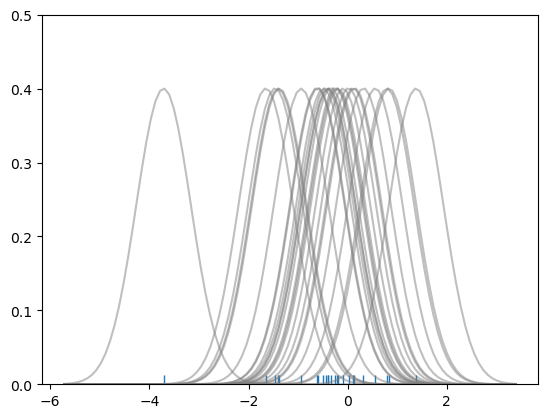

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#    scipy is a calculus and linear alg. library

# Create random dataset
dataset = np.random.randn(25)

# Create rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2 # +/- 2 is for buffer 
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Plot each basis function
kernel_list = []
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,0.5)

Text(0.5, 0.98, 'Sum of the Basis Functions')

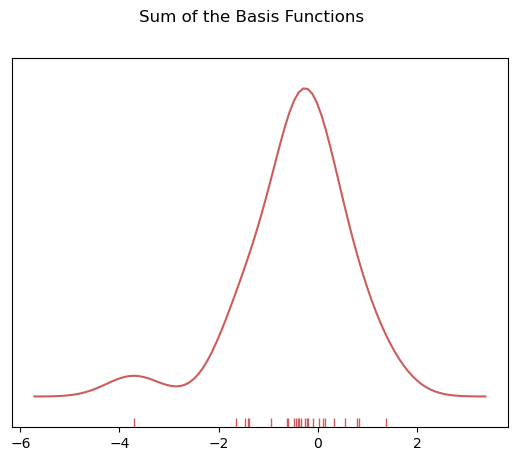

In [24]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset with everything come together. 

Text(0.5, 0.98, 'KDE of Total Bill')

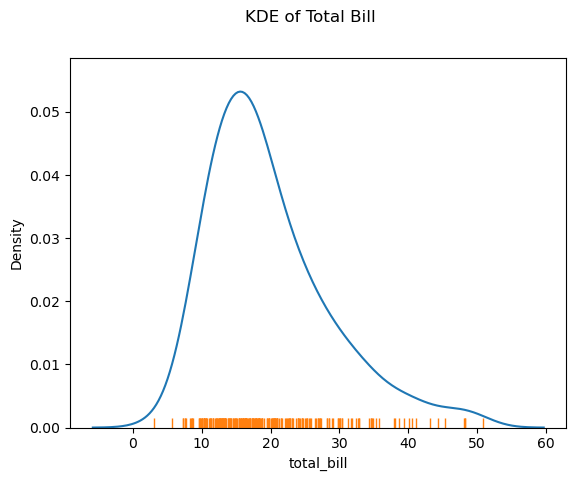

In [32]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
plt.suptitle("KDE of Total Bill")

Text(0.5, 0.98, 'KDE of Tips')

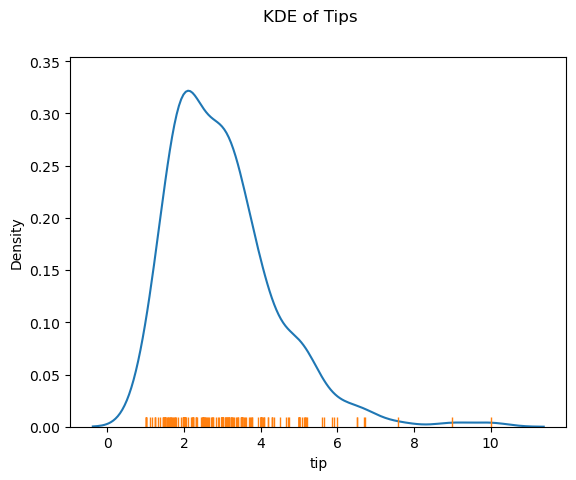

In [33]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
plt.suptitle("KDE of Tips")